# Clasificación de Objetos de Moda
### Por: Santiago Andrés Rocha y Sebastián Rojas Bueno

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### Datos

In [6]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')
y=train.label
x=train.drop('label',axis=1)

In [7]:
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [8]:
test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


<Axes: >

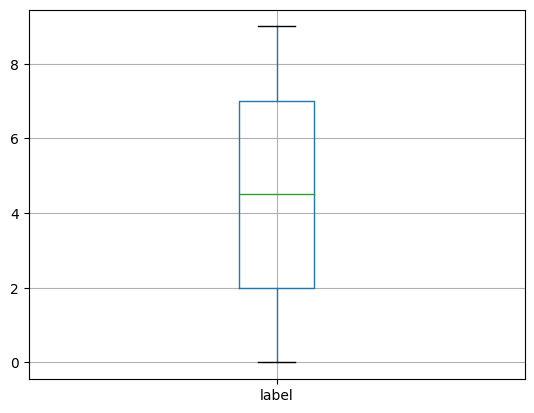

In [9]:
train.boxplot('label',)

<Axes: >

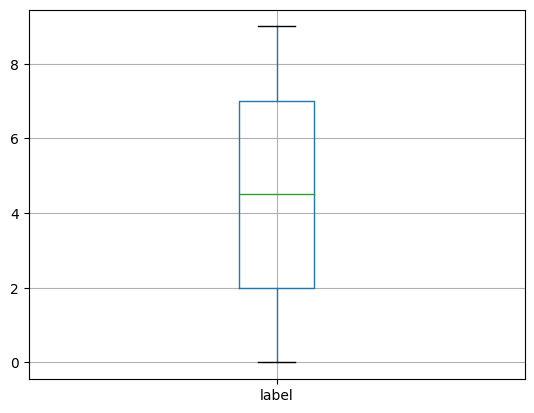

In [10]:
test.boxplot('label')

#### Encontramos

0. Camisetas
1. Pantalones
2. Busos
3. Vestidos
4. Chaquetas
5. Sandalias
6. Camisas
7. Tenis
8. Bolsos
9. Zapatos

#### Distribución de los datos:

In [11]:
for i in range(9):
  print(len(y[y==i]))

6000
6000
6000
6000
6000
6000
6000
6000
6000


In [12]:
yTestAnalysis = test.label
for i in range(9):
  print(len(yTestAnalysis[yTestAnalysis==i]))

1000
1000
1000
1000
1000
1000
1000
1000
1000


#### Algunos Ejemplos

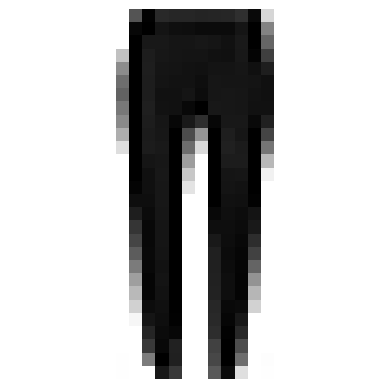

In [13]:
# Pantalones - 1
img = np.array(x.iloc[29])
img_reshape = img.reshape(28,28)
plt.imshow(img_reshape,cmap=mpl.cm.binary)
plt.axis('off')
plt.show()

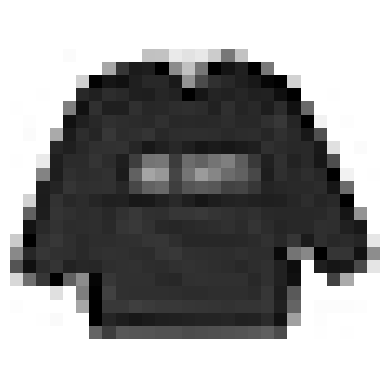

In [14]:
# Busos - 2
img = np.array(x.iloc[0])
img_reshape = img.reshape(28,28)
plt.imshow(img_reshape,cmap=mpl.cm.binary)
plt.axis('off')
plt.show()

In [15]:
y[y==2]

0        2
14       2
15       2
34       2
38       2
        ..
59928    2
59954    2
59960    2
59972    2
59993    2
Name: label, Length: 6000, dtype: int64

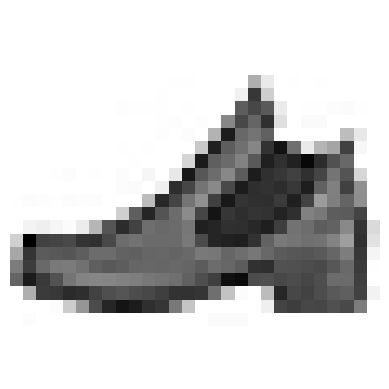

In [16]:
# Zapatos - 9
img = np.array(x.iloc[1])
img_reshape = img.reshape(28,28)
plt.imshow(img_reshape,cmap=mpl.cm.binary)
plt.axis('off')
plt.show()

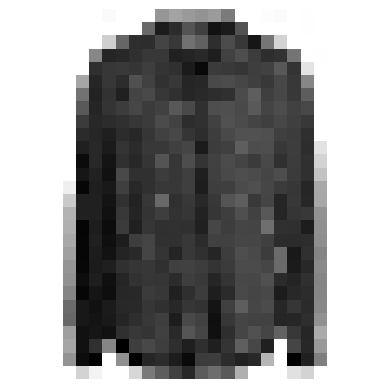

In [17]:
# Camisas - 6
img = np.array(x.iloc[2])
img_reshape = img.reshape(28,28)
plt.imshow(img_reshape,cmap=mpl.cm.binary)
plt.axis('off')
plt.show()

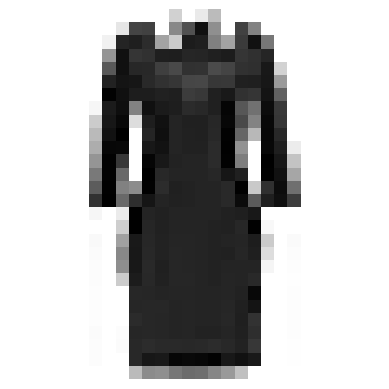

In [18]:
# Vestidos - 3
img = np.array(x.iloc[4])
img_reshape = img.reshape(28,28)
plt.imshow(img_reshape,cmap=mpl.cm.binary)
plt.axis('off')
plt.show()

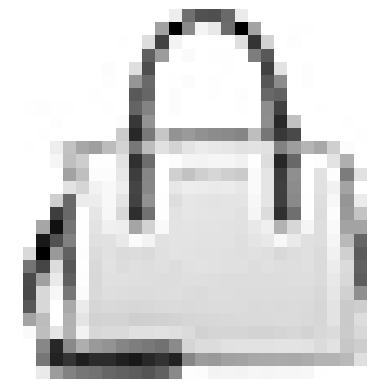

In [19]:
# Bolsos - 8
img = np.array(x.iloc[11])
img_reshape = img.reshape(28,28)
plt.imshow(img_reshape,cmap=mpl.cm.binary)
plt.axis('off')
plt.show()

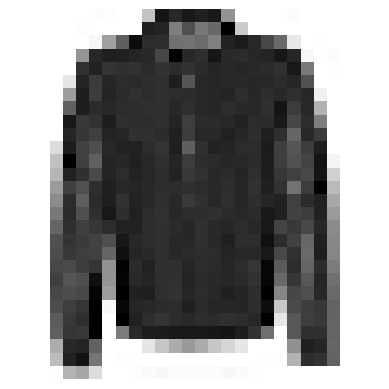

In [20]:
# Chaquetas - 4
img = np.array(x.iloc[8])
img_reshape = img.reshape(28,28)
plt.imshow(img_reshape,cmap=mpl.cm.binary)
plt.axis('off')
plt.show()

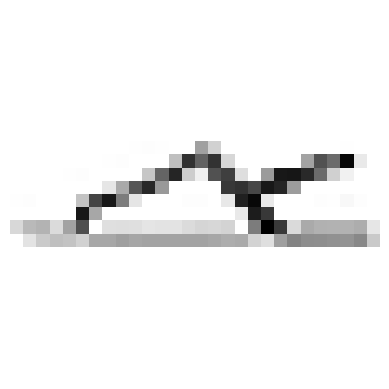

In [21]:
# Sandalias - 5
img = np.array(x.iloc[7])
img_reshape = img.reshape(28,28)
plt.imshow(img_reshape,cmap=mpl.cm.binary)
plt.axis('off')
plt.show()

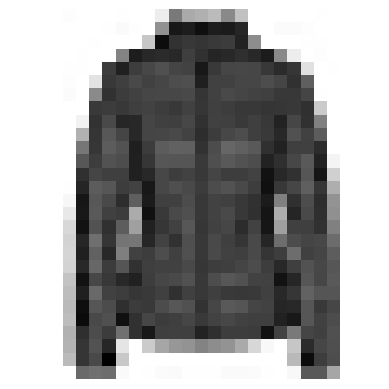

In [22]:
# Chaquetas Femeninas - 7
img = np.array(x.iloc[25])
img_reshape = img.reshape(28,28)
plt.imshow(img_reshape,cmap=mpl.cm.binary)
plt.axis('off')
plt.show()

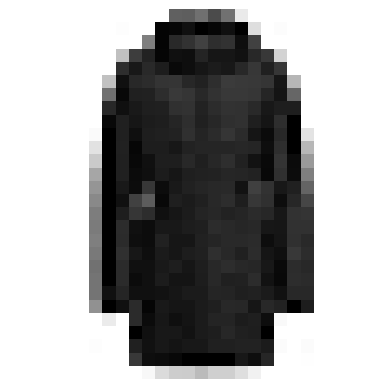

In [23]:
# Abrigos - 8
img = np.array(x.iloc[6])
img_reshape = img.reshape(28,28)
plt.imshow(img_reshape,cmap=mpl.cm.binary)
plt.axis('off')
plt.show()

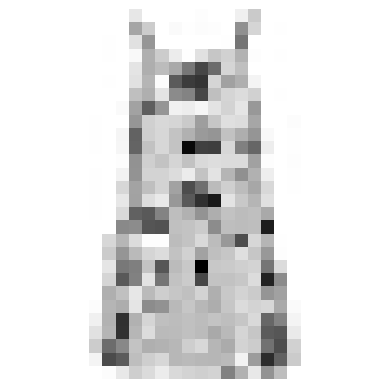

In [24]:
# Vestidos - 3
img = np.array(x.iloc[36])
img_reshape = img.reshape(28,28)
plt.imshow(img_reshape,cmap=mpl.cm.binary)
plt.axis('off')
plt.show()

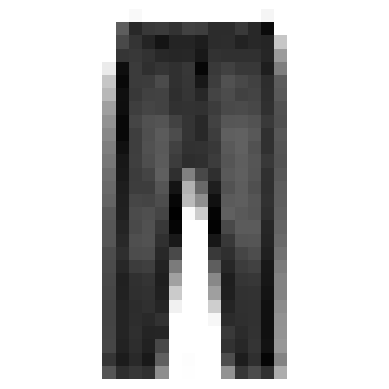

In [25]:
# Pantalones - 1
img = np.array(x.iloc[39])
img_reshape = img.reshape(28,28)
plt.imshow(img_reshape,cmap=mpl.cm.binary)
plt.axis('off')
plt.show()

In [26]:
def plot_images(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

#### Visualización de Ejemplos (100/60000)

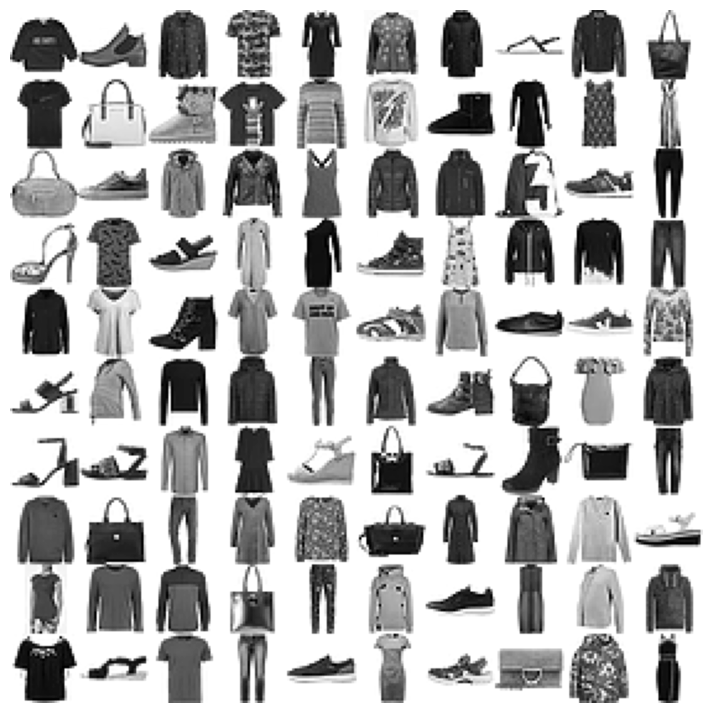

In [27]:
plt.figure(figsize=(9,9))
example_images = x[:100]
plot_images(example_images, images_per_row=10)
# save_fig("more_digits_plot")
plt.show()

In [28]:
test.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


---
## Modelo 1
* Tomado de Sujay Kapadnis

In [29]:
final_labels = test.label

In [30]:
validation_set = test.drop('label',axis=1)

In [31]:
x=x.to_numpy()
y = y.to_numpy()
validation_set = validation_set.to_numpy()

In [32]:
x = x.reshape(-1,28,28,1)
validation_set = validation_set.reshape(-1,28,28,1)

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size = 0.15)

In [34]:
train_df = tf.data.Dataset.from_tensor_slices((x_train,y_train))
test_df = tf.data.Dataset.from_tensor_slices((x_test,y_test))

returning = tf.data.Dataset.from_tensor_slices((validation_set,))

In [35]:
print(type(x_test),type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [36]:
print(type(test_df))

<class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'>


In [37]:
test_df

<_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [38]:
train_df = train_df.batch(32,drop_remainder=True)
test_df = test_df.batch(32,drop_remainder=True)
returning = returning.batch(32)

In [39]:
# Padding Same, Mantiene el tamaño de la entrada de la capa a la salida de la capa


model = keras.Sequential([
    
    # Parte Convolucional
    keras.layers.Rescaling(scale=1./255,input_shape = (28,28,1)),

    keras.layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same'),

    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),

    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'),

    keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),

    keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),

    # Parte Simple
    keras.layers.Flatten(),
    ## Capa de Salida
    keras.layers.Dense(10,activation='sigmoid')
    
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history1 = model.fit(train_df,epochs = 5)
resultsTrain = model.evaluate(test_df)

Epoch 1/5
1593/1593 [==============================] - 324s 203ms/step - loss: 0.4117 - accuracy: 0.8531
Epoch 2/5
1593/1593 [==============================] - 321s 202ms/step - loss: 0.2583 - accuracy: 0.9063
Epoch 3/5
1593/1593 [==============================] - 319s 201ms/step - loss: 0.2104 - accuracy: 0.9236
Epoch 4/5
1593/1593 [==============================] - 324s 203ms/step - loss: 0.1699 - accuracy: 0.9392
Epoch 5/5
281/281 [==============================] - 14s 49ms/step - loss: 0.2889 - accuracy: 0.9115


In [40]:
resultsTest = model.predict(returning)

313/313 [==============================] - 15s 48ms/step


In [41]:
eval_set = tf.data.Dataset.from_tensor_slices((validation_set,final_labels))

In [42]:
eval_set = eval_set.batch(32,drop_remainder=True)
eval_set

<_BatchDataset element_spec=(TensorSpec(shape=(32, 28, 28, 1), dtype=tf.int64, name=None), TensorSpec(shape=(32,), dtype=tf.int64, name=None))>

In [43]:
resultsValid = model.evaluate(eval_set)

312/312 [==============================] - 16s 51ms/step - loss: 0.2609 - accuracy: 0.9178


### Resultados Modelo 1

#### Entrenamiento

In [44]:
history1.history.keys()

dict_keys(['loss', 'accuracy'])

In [45]:
resultsTrain

[0.2889130413532257, 0.9114768505096436]

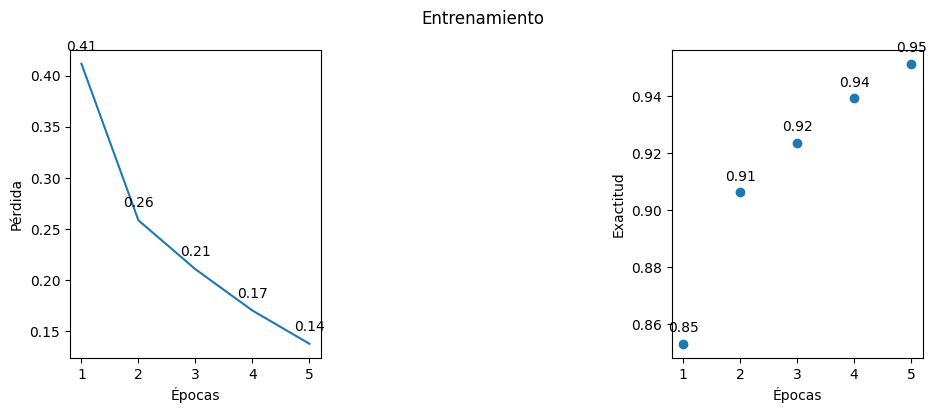

In [46]:
epochs = [1,2,3,4,5]
loss = history1.history['loss']
accuracy = history1.history['accuracy']

plt.figure(figsize=(11, 4))
plt.suptitle('Entrenamiento')

plt.subplot(131)
plt.plot(epochs, loss)
plt.ylabel('Pérdida')
plt.xlabel('Épocas')
for x, y in zip(epochs, loss):
    plt.text(x, y + 0.01, '%.2f' % y, ha='center', va='bottom')

##
## NO VA en TRAINING
##
plt.subplot(133)
plt.scatter(epochs, accuracy)
plt.ylabel('Exactitud')
plt.xlabel('Épocas')
for x, y in zip(epochs, accuracy):
    plt.text(x, y + 0.003, '%.2f' % y, ha='center', va='bottom')

##### Pérdida Entrenamiento

In [47]:
print("Pérdida Entrenamiento: " + str(round(loss[-1],4)))

Pérdida Entrenamiento: 0.1374


##### Exactitud Entrenamiento

In [48]:
print("Exactitud Entrenamiento: " + str(round(accuracy[-1]*100,4)) + "%")

Exactitud Entrenamiento: 95.1212%


---
#### Pruebas


* Trabajo futuro:
  * Matriz de confusión

##### Exactitud Pruebas

In [49]:
print("Exactitud Entrenamiento: " + str(round(resultsTrain[1]*100,4)) + "%")

Exactitud Entrenamiento: 91.1477%


#### Tiempo
* 33 minutos aprox

---
## Modelo 2
* Variación: Función de activación de Sigmoid a Softmax en capa de salida

In [50]:
# Padding Same, Mantiene el tamaño de la entrada de la capa a la salida de la capa


model2 = keras.Sequential([
    
    # Parte Convolucional
    keras.layers.Rescaling(scale=1./255,input_shape = (28,28,1)),

    keras.layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same'),

    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),

    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'),

    keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),

    keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),

    # Parte Simple
    keras.layers.Flatten(),
    ## Capa de Salida
    keras.layers.Dense(10,activation='softmax')
    
])
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history2 = model2.fit(train_df,epochs = 5)
resultsTrain2 = model2.evaluate(test_df)

Epoch 1/5
1593/1593 [==============================] - 321s 201ms/step - loss: 0.4026 - accuracy: 0.8559
Epoch 2/5
1593/1593 [==============================] - 321s 201ms/step - loss: 0.2539 - accuracy: 0.9090
Epoch 3/5
1593/1593 [==============================] - 320s 201ms/step - loss: 0.2042 - accuracy: 0.9276
Epoch 4/5
1593/1593 [==============================] - 319s 200ms/step - loss: 0.1627 - accuracy: 0.9421
Epoch 5/5
281/281 [==============================] - 14s 50ms/step - loss: 0.2943 - accuracy: 0.9099


### Resultados Modelo 2

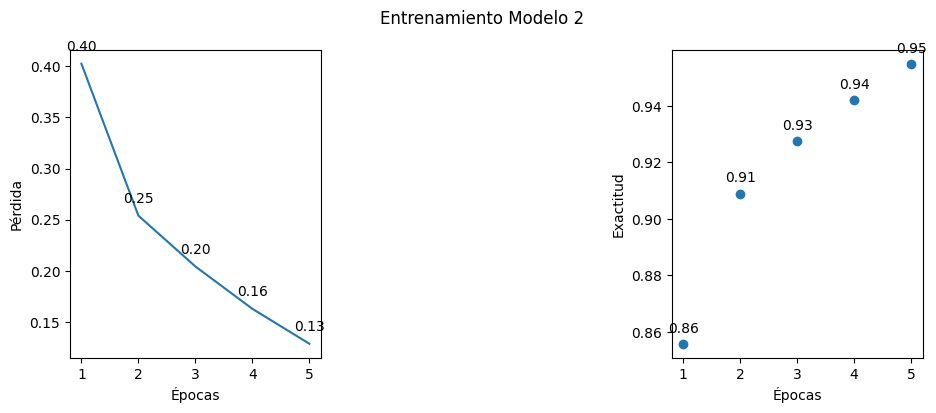

In [51]:
epochs = [1,2,3,4,5]
loss2 = history2.history['loss']
accuracy2 = history2.history['accuracy']

plt.figure(figsize=(11, 4))
plt.suptitle('Entrenamiento Modelo 2')

plt.subplot(131)
plt.plot(epochs, loss2)
plt.ylabel('Pérdida')
plt.xlabel('Épocas')
for x, y in zip(epochs, loss2):
    plt.text(x, y + 0.01, '%.2f' % y, ha='center', va='bottom')

##
## NO VA en TRAINING
##
plt.subplot(133)
plt.scatter(epochs, accuracy2)
plt.ylabel('Exactitud')
plt.xlabel('Épocas')
for x, y in zip(epochs, accuracy2):
    plt.text(x, y + 0.003, '%.2f' % y, ha='center', va='bottom')

In [52]:
resultsTrain2

[0.29425010085105896, 0.9099199175834656]

In [53]:
resultsTrain

[0.2889130413532257, 0.9114768505096436]

In [54]:
resultsTest2 = model2.predict(returning)

313/313 [==============================] - 15s 48ms/step


In [55]:
resultsValid2 = model2.evaluate(eval_set)

312/312 [==============================] - 15s 49ms/step - loss: 0.2679 - accuracy: 0.9167


#### Entrenamiento

##### Pérdida Entrenamiento

In [56]:
print("Pérdida Entrenamiento: " + str(round(loss2[-1],4)))

Pérdida Entrenamiento: 0.2943


##### Exactitud Entrenamiento

In [57]:
print("Exactitud Entrenamiento: " + str(round(accuracy2[-1]*100,4)) + "%")

Exactitud Entrenamiento: 90.992%


#### Pruebas

##### Exactitud Pruebas

In [59]:
print("Exactitud Validación: " + str(round(resultsValid2[1]*100,4)) + "%")

Exactitud Validación: 91.6667%


---
## Modelo 3
* Variación: De 5 a 7 épocas

In [60]:
# Padding Same, Mantiene el tamaño de la entrada de la capa a la salida de la capa


model3 = keras.Sequential([
    
    # Parte Convolucional
    keras.layers.Rescaling(scale=1./255,input_shape = (28,28,1)),

    keras.layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same'),

    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),

    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'),

    keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),

    keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),

    # Parte Simple
    keras.layers.Flatten(),
    ## Capa de Salida
    keras.layers.Dense(10,activation='softmax')
    
])
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history3 = model3.fit(train_df,epochs = 7)
resultsTrain3 = model3.evaluate(test_df)

Epoch 1/7
1593/1593 [==============================] - 345s 215ms/step - loss: 0.4137 - accuracy: 0.8512
Epoch 2/7
1593/1593 [==============================] - 322s 202ms/step - loss: 0.2593 - accuracy: 0.9056
Epoch 3/7
1593/1593 [==============================] - 342s 214ms/step - loss: 0.2106 - accuracy: 0.9246
Epoch 4/7
1593/1593 [==============================] - 323s 203ms/step - loss: 0.1701 - accuracy: 0.9398
Epoch 5/7
1593/1593 [==============================] - 320s 201ms/step - loss: 0.1367 - accuracy: 0.9503
Epoch 6/7
1593/1593 [==============================] - 318s 200ms/step - loss: 0.1070 - accuracy: 0.9619
Epoch 7/7
281/281 [==============================] - 14s 49ms/step - loss: 0.3394 - accuracy: 0.9106


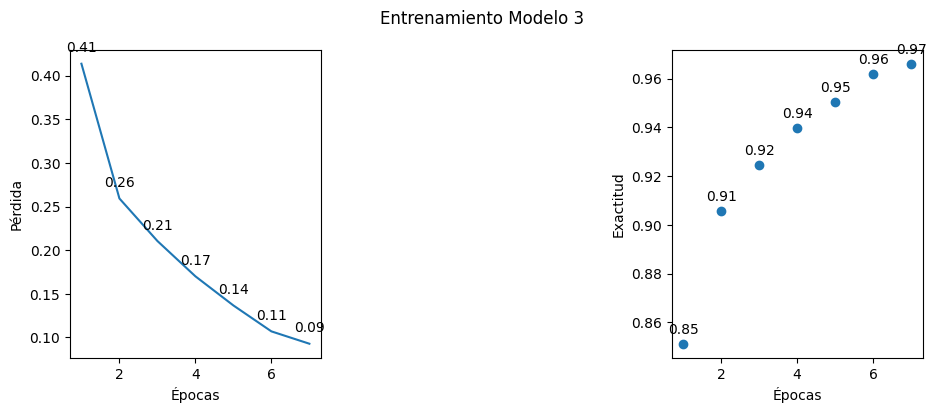

In [61]:
epochs2 = [1,2,3,4,5,6,7]
loss3 = history3.history['loss']
accuracy3 = history3.history['accuracy']

plt.figure(figsize=(11, 4))
plt.suptitle('Entrenamiento Modelo 3')

plt.subplot(131)
plt.plot(epochs2, loss3)
plt.ylabel('Pérdida')
plt.xlabel('Épocas')
for x, y in zip(epochs2, loss3):
    plt.text(x, y + 0.01, '%.2f' % y, ha='center', va='bottom')

##
## NO VA en TRAINING
##
plt.subplot(133)
plt.scatter(epochs2, accuracy3)
plt.ylabel('Exactitud')
plt.xlabel('Épocas')
for x, y in zip(epochs2, accuracy3):
    plt.text(x, y + 0.003, '%.2f' % y, ha='center', va='bottom')

In [62]:
resultsTrain3

[0.3393948972225189, 0.9105871915817261]

In [63]:
resultsTrain

[0.2889130413532257, 0.9114768505096436]

In [64]:
resultsTest3 = model3.predict(returning)

313/313 [==============================] - 16s 50ms/step


In [65]:
resultsValid3 = model3.evaluate(eval_set)

312/312 [==============================] - 16s 51ms/step - loss: 0.3176 - accuracy: 0.9163


### Resultados Modelo 3

#### Entrenamiento

##### Pérdida Entrenamiento

In [73]:
print("Pérdida Entrenamiento: " + str(round(loss3[-1],4)))

Pérdida Entrenamiento: 0.0929


##### Exactitud Entrenamiento

In [74]:
print("Exactitud Entrenamiento: " + str(round(accuracy3[-1]*100,4)) + "%")

Exactitud Entrenamiento: 96.6082%


#### Pruebas

##### Exactitud Pruebas

In [69]:
print("Exactitud Validación: " + str(round(resultsValid3[1]*100,4)) + "%")

Exactitud Validación: 91.6266%


---
---
---


## Comparación de los Resultados

### Pérdidas en entrenamiento

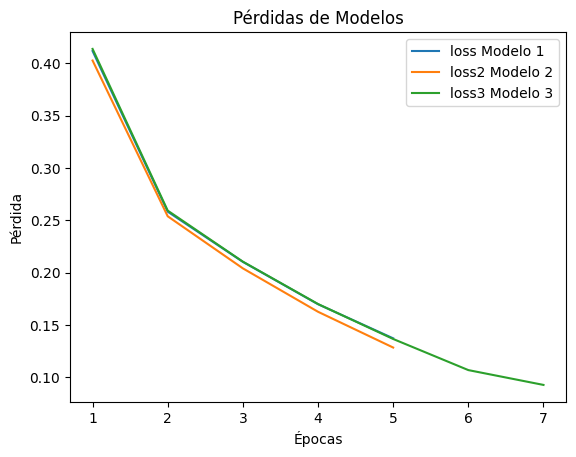

In [77]:
fig, ax = plt.subplots()

ax.plot(epochs, loss, label='loss Modelo 1')
ax.plot(epochs, loss2, label='loss2 Modelo 2')
ax.plot(epochs2, loss3, label='loss3 Modelo 3')

ax.set_title('Pérdidas de Modelos')
ax.set_xlabel('Épocas')
ax.set_ylabel('Pérdida')
ax.legend()

plt.show()

### Exactitud de Entrenamiento

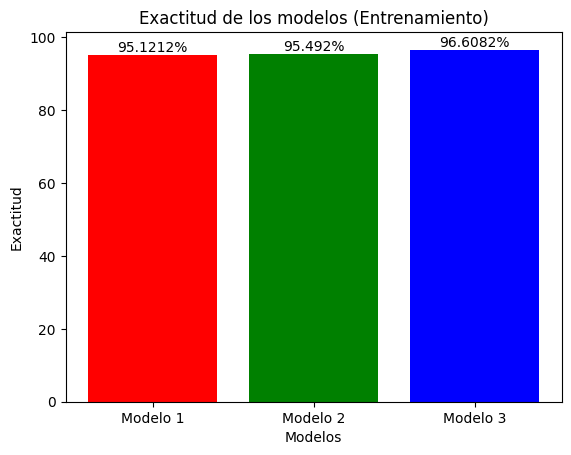

In [87]:
fig, ax = plt.subplots()

valores = [accuracy[-1], accuracy2[-1], accuracy3[-1]]

nombres = ['Modelo 1', 'Modelo 2', 'Modelo 3']

colores = ['red', 'green', 'blue']

ax.bar(nombres, valores, color=colores)

ax.set_title('Exactitud de los modelos (Entrenamiento)')
ax.set_xlabel('Modelos')
ax.set_ylabel('Exactitud')

for i, v in enumerate(valores):
    ax.text(i, v, str(round(v*100,4)) + "%", ha='center', va='bottom')

plt.show()

### Exactitud de Pruebas

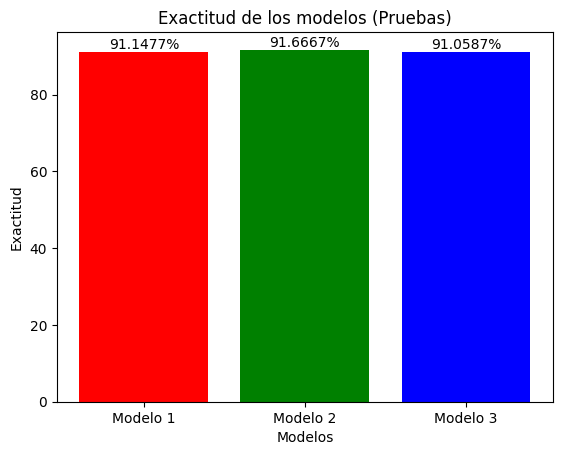

In [88]:
fig, ax = plt.subplots()

valores = [resultsTrain[1], resultsTrain2[1], resultsTrain3[1]]

nombres = ['Modelo 1', 'Modelo 2', 'Modelo 3']

colores = ['red', 'green', 'blue']

ax.bar(nombres, valores, color=colores)

ax.set_title('Exactitud de los modelos (Pruebas)')
ax.set_xlabel('Modelos')
ax.set_ylabel('Exactitud')

for i, v in enumerate(valores):
    ax.text(i, v, str(round(v*100,4)) + "%", ha='center', va='bottom')

plt.show()